In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [14]:
raw_boardings = pd.read_csv('data/Weekday Average Boardings by Stop.csv')
raw_boardings.shape

(2863, 4)

In [15]:
raw_boardings.dtypes

Public Route Name    object
Stop ID               int64
Stop Name            object
Avg Ons               int64
dtype: object

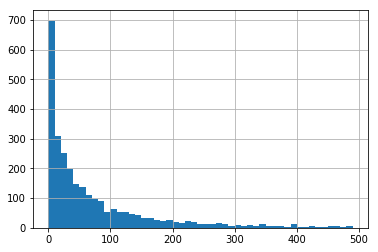

In [19]:
raw_boardings['Avg Ons'].hist(bins=np.arange(0,500,10))
plt.show()

In [24]:
df = raw_boardings.copy()
df.groupby('Stop ID').nunique()[['Public Route Name']].sort_values('Public Route Name', ascending=False).head()

,Public Route Name
Stop ID,
5640,10
5643,10
5645,10
5685,10
5652,9


In [38]:
idx = df.index[df['Stop ID']==5652]
df.loc[idx]

,Public Route Name,Stop ID,Stop Name,Avg Ons
262,6,5652,Market St&9th St S-NS/SI,139
320,7,5652,Market St&9th St S-NS/SI,148
531,9,5652,Market St&9th St S-NS/SI,156
574,9R,5652,Market St&9th St S-NS/SI,160
925,21,5652,Market St&9th St S-NS/SI,196
2596,F,5652,Market St&9th St S-NS/SI,57
2649,K,5652,Market St&9th St S-NS/SI,2
2738,L,5652,Market St&9th St S-NS/SI,10
2807,N,5652,Market St&9th St S-NS/SI,12


In [88]:
idx = df.index[df['Public Route Name']=='38']
df.loc[idx].sort_values('Stop ID').head()

,Public Route Name,Stop ID,Stop Name,Avg Ons,Root Route Name
1709,38,3089,Beale St&Mission St W-MB/BZ,66,38
1674,38,3567,43rd Ave&Clement St SW-FS/SB,47,38
1676,38,3568,43rd Ave&Point Lobos Ave NW-NS/PS,82,38
1671,38,3608,48th Ave&Point Lobos Ave SW-FS/BZ,30,38
1696,38,4256,Geary Blvd&3RD Ave SW-NS/BZ,292,38


In [49]:
df.groupby(['Stop ID','Stop Name']).sum()[['Avg Ons']].sort_values('Avg Ons', ascending=False).head(10)

,,Avg Ons
Stop ID,Stop Name,
5551,Mission St&16th St NE-FS/BZ,3019
5565,Mission St&24th St NE-FS/BB,2939
6817,Van Ness Ave&Market St NE-FS/BZ,2882
5593,Mission St&Geneva Ave E-FS/BB,2412
4805,Balboa Park BART Station SW-MB/BZ,2250
4294,Geary Blvd&Divisadero St SW-NS/BZ,2155
7619,Beale St&Howard St W-FS/SI,2140
4270,Geary Blvd&25TH Ave SW-NS/BZ,2048
4258,Geary Blvd&6TH Ave SW-NS/BZ,2038


In [48]:
df.groupby(['Public Route Name']).sum()[['Avg Ons']].sort_values('Avg Ons', ascending=False).head(10)

,Avg Ons
Public Route Name,
38R,17813
14,14450
49,13884
38,13018
8,12453
30,10796
29,10379
1,10301
44,9790


In [68]:
df['Root Route Name'] = df['Public Route Name'].str.replace('R','').str.replace('X','').str.replace('A','').str.replace('B','')

In [86]:
df_0 = df.groupby(['Root Route Name']).sum()[['Avg Ons']].sort_values('Avg Ons', ascending=False)
df_0['Cum Sum'] = df_0['Avg Ons'].cumsum()

In [87]:
df_0.to_clipboard()

In [70]:
df['Root Route Name'].unique()

array(['1', '2', '3', '5', '6', '7', '8', '9', '10', '12', '14', '18',
       '19', '21', '22', '23', '24', '25', '27', '28', '29', '30', '31',
       '33', '35', '36', '37', '38', '39', '41', '43', '44', '45', '47',
       '48', '49', '52', '54', '55', '56', '57', '66', '67', '81', '82',
       '83', '88', '90', '91', 'F', 'J', 'K', 'KT', 'L', 'M', 'N'],
      dtype=object)

In [71]:
df['Public Route Name'].unique()

array(['1', '1AX', '1BX', '2', '3', '5', '5R', '6', '7', '7X', '8', '8AX',
       '8BX', '9', '9R', '10', '12', '14', '14R', '14X', '18', '19', '21',
       '22', '23', '24', '25', '27', '28', '28R', '29', '30', '30X', '31',
       '31AX', '31BX', '33', '35', '36', '37', '38', '38AX', '38BX',
       '38R', '39', '41', '43', '44', '45', '47', '48', '49', '52', '54',
       '55', '56', '57', '66', '67', '81X', '82X', '83X', '88', '90',
       '91', 'F', 'J', 'K', 'KT', 'L', 'M', 'N', 'NX'], dtype=object)

In [67]:
df['Avg Ons'].sum()

273964